In [67]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, classification_report, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split


In [68]:
mon_laun_path = "C:/Users/zzhan/OneDrive/Рабочий стол/XGB/datasets/merged_dataset.csv"
"""
0+10
01+0
"""
mon_laun_df = pd.read_csv(mon_laun_path)


display(mon_laun_df)

,Unnamed: 0,transactionID,sourceAccountID,targetAccountID,timestamp,fan_in_bins_2-3,fan_in_bins_3-inf,fan_out_bins_2-3,fan_out_bins_3-inf,degree_in_bins_2-3,degree_in_bins_3-inf,degree_out_bins_2-3,degree_out_bins_3-inf,scatter-gather_bins_2-3,scatter-gather_bins_3-inf,temp-cycle_bins_2-3,temp-cycle_bins_3-inf,source_fan_out,source_deg_out,source_ratio_out,source_avg_col3_out,source_sum_col3_out,source_var_col3_out,source_skew_col3_out,source_kurtosis_col3_out,source_fan_in,source_deg_in,source_ratio_in,source_avg_col3_in,source_sum_col3_in,source_var_col3_in,source_skew_col3_in,source_kurtosis_col3_in,dest_fan_out,dest_deg_out,dest_ratio_out,dest_avg_col3_out,dest_sum_col3_out,dest_var_col3_out,dest_skew_col3_out,dest_kurtosis_col3_out,dest_fan_in,dest_deg_in,dest_ratio_in,dest_avg_col3_in,dest_sum_col3_in,dest_var_col3_in,dest_skew_col3_in,dest_kurtosis_col3_in,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,sourceAccount,targetAccount
0,0,1.0,1.0,2.0,20.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,20.000000,40.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,20.000000,40.0,0.000000,0.000000,0.0,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,32088000F4580,18000F5340
1,1,8.0,9.0,10.0,26.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,26.000000,52.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,26.000000,52.0,0.000000,0.000000,0.0,2022-09-01 00:26:00,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0,128000EC280,24398017BF800
2,2,9.0,11.0,12.0,21.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,21.000000,42.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,21.000000,42.0,0.000000,0.000000,0.0,2022-09-01 00:21:00,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0,18000EDEC0,21105080AEF5310
3,3,10.0,13.0,14.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,4.000000,8.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,4.000000,8.0,0.000000,0.000000,0.0,2022-09-01 00:04:00,1,8000F4510,11813,8011305D0,9.82,US Dollar,9.82,US Dollar,Credit Card,0,18000F4510,118138011305D0
4,4,12.0,16.0,17.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,8.000000,16.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,8.000000,16.0,0.000000,0.000000,0.0,2022-09-01 00:08:00,1,8000F4FE0,245335,812ED62E0,4.01,US Dollar,4.01,US Dollar,Credit Card,0,18000F4FE0,245335812ED62E0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,4971.0,1033.0,4165.0,14.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,13.666667,82.0,1.555556,-0.381802,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,13.666667,82.0,1.555556,-0.381802,1.5,2022-09-01 00:14:00,1,800327650,1688,800878710,28269.24,US Dollar,28269.24,US Dollar,Cheque,0,1800327650,1688800878710
1378,1378,4972.0,1033.0,4165.0,12.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,13.666667,82.0,1.555556,-0.381802,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,13.666667,82.0,1.555556,-0.381802,1.5,2022-09-01 00:12:00,1,800327650,1688,800878710,6278.23,US Dollar,6278.23,US Dollar,Credit Card,0,1800327650,1688800878710
1379,1379,4973.0,1033.0,4165.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,13.666667,82.0,1.555556,-0.381802,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,13.666667,8

In [69]:
"""enriched_df = pd.read_csv("C:/Users/zzhan/OneDrive/Рабочий стол/XGB/Datasets/enriched_pure.csv")"""
enriched_df = mon_laun_df

train_df_target = mon_laun_df[["Is Laundering"]].astype(int)
train_df_data = mon_laun_df.drop(columns=["Is Laundering"])

train_df_data = train_df_data.drop(columns=['Timestamp', 'Account', 'Account.1', 'Receiving Currency','Payment Currency','Payment Format','sourceAccount','targetAccount'])
X = train_df_data.to_numpy()
y = train_df_target.to_numpy()


In [70]:
print(len(X))
print(len(X[0]))
print(len(y))

1382
53
1382


In [71]:
train_df_data.dtypes


Unnamed: 0                     int64
transactionID                float64
sourceAccountID              float64
targetAccountID              float64
timestamp                    float64
fan_in_bins_2-3              float64
fan_in_bins_3-inf            float64
fan_out_bins_2-3             float64
fan_out_bins_3-inf           float64
degree_in_bins_2-3           float64
degree_in_bins_3-inf         float64
degree_out_bins_2-3          float64
degree_out_bins_3-inf        float64
scatter-gather_bins_2-3      float64
scatter-gather_bins_3-inf    float64
temp-cycle_bins_2-3          float64
temp-cycle_bins_3-inf        float64
source_fan_out               float64
source_deg_out               float64
source_ratio_out             float64
source_avg_col3_out          float64
source_sum_col3_out          float64
source_var_col3_out          float64
source_skew_col3_out         float64
source_kurtosis_col3_out     float64
source_fan_in                float64
source_deg_in                float64
s

In [72]:
params = {
 'objective': 'multi:softprob',
 'eval_metric': ['error@0.4']}

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric = ['error@1.0'])
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))


[[1381    0]
 [   1    0]]


In [73]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(xgb_model.score(X,y))

1.0


In [74]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No death event', 'Death event']); ax.yaxis.set_ticklabels(['No death event', 'Death event'])
    plt.show()

In [75]:
def Grid_and_eval(classifier,params,cv=10, X_train_stand = X,Y_train = y,X_test_stand = X, Y_test = y):
    parameters = params
    model_cv = GridSearchCV(classifier,parameters,cv=cv,scoring='f1',verbose=0)
    model_cv.fit(X_train_stand,Y_train) 
    print("Tuned hyperparameters: ",model_cv.best_params_)
    print("Mean CV f1_score of best_estimator, on Training:",model_cv.best_score_)
    best_model = model_cv.best_estimator_
    print("Best estimator:",best_model)
    print("f1 on Test data (Positive case only):",model_cv.score(X_test_stand,Y_test))
    print("f1 on Train data:",model_cv.score(X_train_stand,Y_train))

    yhat=model_cv.predict(X_test_stand)   #Using the best found params 

    print("Classification report:") 
    print(classification_report(Y_test,yhat))#,output_dict=True)) 
    plot_confusion_matrix(Y_test,yhat)
    
    precision, recall, f1_res, _ = precision_recall_fscore_support(Y_test,yhat,average='weighted')
    
    ######## ROC curve ############
    y_pred_proba = model_cv.predict_proba(X_test_stand)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.legend(loc=4)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid()
    plt.show()
    return [f1_res,auc,precision,recall]

Tuned hyperparameters:  {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 70}
Mean CV f1_score of best_estimator, on Training: 0.9735590593298484
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)
f1 on Test data (Positive case only): 0.9972067039106145
f1 on Train data: 0.9972067039

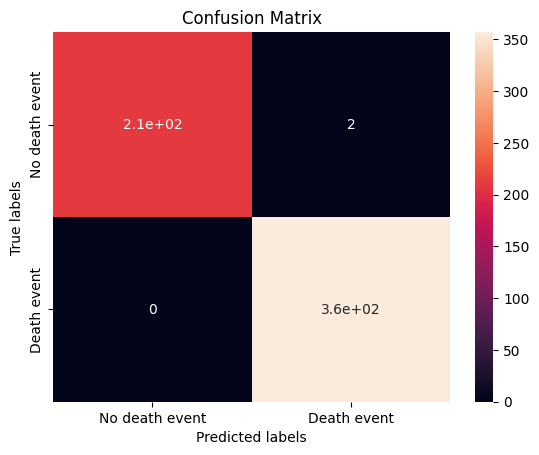

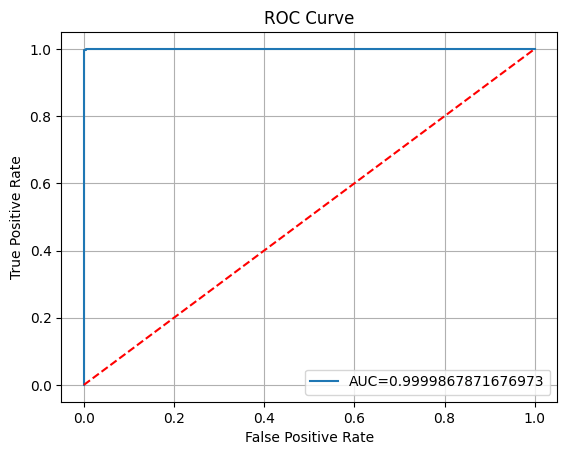

[0.9964816414052663,
 0.9999867871676973,
 0.9965046433414435,
 0.9964850615114236]

In [76]:
Grid_and_eval(xgb.XGBClassifier(objective= 'binary:logistic',nthread=4),{
    'max_depth': [2,4,6],
    'n_estimators': [60,70,80],
    'learning_rate': [0.1, 0.01, 0.05]
}
              ,cv=5)

In [77]:
mon_laun_path = "C:/Users/zzhan/OneDrive/Рабочий стол/XGB/datasets/merged_dataset.csv"
df = pd.read_csv(mon_laun_path)

whodoneit = df[df['Is Laundering'] == 1]

df = pd.concat([df, whodoneit], ignore_index=True)
df = pd.concat([df, whodoneit], ignore_index=True)
df = pd.concat([df, whodoneit], ignore_index=True)
df = pd.concat([df, whodoneit], ignore_index=True)
df = pd.concat([df, whodoneit], ignore_index=True)

whodoneit = df[df['Is Laundering'] == 1]

print(whodoneit)

      Unnamed: 0  transactionID  sourceAccountID  targetAccountID  timestamp  \
1313        1313         4742.0            135.0           3986.0       21.0   
1382        1313         4742.0            135.0           3986.0       21.0   
1383        1313         4742.0            135.0           3986.0       21.0   
1384        1313         4742.0            135.0           3986.0       21.0   
1385        1313         4742.0            135.0           3986.0       21.0   
1386        1313         4742.0            135.0           3986.0       21.0   

      fan_in_bins_2-3  fan_in_bins_3-inf  fan_out_bins_2-3  \
1313              0.0                0.0               0.0   
1382              0.0                0.0               0.0   
1383              0.0                0.0               0.0   
1384              0.0                0.0               0.0   
1385              0.0                0.0               0.0   
1386              0.0                0.0               0.0   

    

In [78]:
y = np.array(df['Is Laundering'].tolist())
X = np.array(df.drop(columns = ['Is Laundering', 'Account.1', 'Receiving Currency','Payment Currency','Payment Format','sourceAccount','targetAccount',\
    'Unnamed: 0','From Bank', 'To Bank', 'Account', 'Timestamp']).values)
display(df)
X_, X_test, y_, y_test = train_test_split(X,y,test_size=0.2)

,Unnamed: 0,transactionID,sourceAccountID,targetAccountID,timestamp,fan_in_bins_2-3,fan_in_bins_3-inf,fan_out_bins_2-3,fan_out_bins_3-inf,degree_in_bins_2-3,degree_in_bins_3-inf,degree_out_bins_2-3,degree_out_bins_3-inf,scatter-gather_bins_2-3,scatter-gather_bins_3-inf,temp-cycle_bins_2-3,temp-cycle_bins_3-inf,source_fan_out,source_deg_out,source_ratio_out,source_avg_col3_out,source_sum_col3_out,source_var_col3_out,source_skew_col3_out,source_kurtosis_col3_out,source_fan_in,source_deg_in,source_ratio_in,source_avg_col3_in,source_sum_col3_in,source_var_col3_in,source_skew_col3_in,source_kurtosis_col3_in,dest_fan_out,dest_deg_out,dest_ratio_out,dest_avg_col3_out,dest_sum_col3_out,dest_var_col3_out,dest_skew_col3_out,dest_kurtosis_col3_out,dest_fan_in,dest_deg_in,dest_ratio_in,dest_avg_col3_in,dest_sum_col3_in,dest_var_col3_in,dest_skew_col3_in,dest_kurtosis_col3_in,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,sourceAccount,targetAccount
0,0,1.0,1.0,2.0,20.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.000000,20.000000,40.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,20.000000,40.0,0.000000,0.000000,0.0,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,32088000F4580,18000F5340
1,1,8.0,9.0,10.0,26.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.000000,26.000000,52.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,26.000000,52.0,0.000000,0.000000,0.0,2022-09-01 00:26:00,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0,128000EC280,24398017BF800
2,2,9.0,11.0,12.0,21.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.000000,21.000000,42.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,21.000000,42.0,0.000000,0.000000,0.0,2022-09-01 00:21:00,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0,18000EDEC0,21105080AEF5310
3,3,10.0,13.0,14.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.000000,4.000000,8.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,4.000000,8.0,0.000000,0.000000,0.0,2022-09-01 00:04:00,1,8000F4510,11813,8011305D0,9.82,US Dollar,9.82,US Dollar,Credit Card,0,18000F4510,118138011305D0
4,4,12.0,16.0,17.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.000000,8.000000,16.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,8.000000,16.0,0.000000,0.000000,0.0,2022-09-01 00:08:00,1,8000F4FE0,245335,812ED62E0,4.01,US Dollar,4.01,US Dollar,Credit Card,0,18000F4FE0,245335812ED62E0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1313,4742.0,135.0,3986.0,21.0,0.0,0.0,0.0,62.0,0.0,2.0,0.0,62.0,0.0,0.0,0.0,0.0,42.0,192.0,4.571429,14.989583,2878.0,79.760308,-0.081536,1.778086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,14.333333,86.0,24.888889,0.381802,1.5,2022-09-01 00:21:00,70,100428660,1124,800825340,389769.39,US Dollar,389769.39,US Dollar,Cheque,1,70100428660,1124800825340
1383,1313,4742.0,135.0,3986.0,21.0,0.0,0.0,0.0,62.0,0.0,2.0,0.0,62.0,0.0,0.0,0.0,0.0,42.0,192.0,4.571429,14.989583,2878.0,79.760308,-0.081536,1.778086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,14.333333,86.0,24.888889,0.381802,1.5,2022-09-01 00:21:00,70,100428660,1124,800825340,389769.39,US Dollar,389769.39,US Dollar,Cheque,1,70100428660,1124800825340
1384,1313,4742.0,135.0,3986.0,21.0,0.0,0.0,0.0,62.0,0.0,2.0,0.0,62.0,0.0,0.0,0.0,0.0,42.0,192.0,4.571429,14.989583,2878.0,79.760308,

In [79]:
cv_params =  {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]} 
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)

In [80]:
csv.fit(X_,y_)
csv.cv_results_

c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:15

{'mean_fit_time': array([0.02768245, 0.0256628 , 0.02433486, 0.02506299, 0.02816978,
        0.02628598, 0.02902479, 0.02472153, 0.02908812, 0.02485476,
        0.02722635, 0.02770514, 0.02907553, 0.02804532, 0.02726588,
        0.0259635 , 0.02637854, 0.0276567 , 0.02593851, 0.02630882,
        0.02978406, 0.02599444, 0.02535367, 0.02612147]),
 'std_fit_time': array([0.00520318, 0.00430252, 0.00528074, 0.00192795, 0.00433297,
        0.00516664, 0.00425758, 0.00448129, 0.00404929, 0.00181571,
        0.00310182, 0.00402743, 0.00091792, 0.0029835 , 0.00263233,
        0.00411927, 0.00331616, 0.00552123, 0.00359135, 0.00351411,
        0.00287946, 0.00230999, 0.00178752, 0.00478509]),
 'mean_score_time': array([0.00691276, 0.00340619, 0.00360236, 0.00320578, 0.00370641,
        0.00358648, 0.00429258, 0.00350866, 0.00380912, 0.0039103 ,
        0.00350842, 0.00368419, 0.00421085, 0.00450768, 0.00351472,
        0.0031126 , 0.00450521, 0.00371199, 0.00371947, 0.00410714,
        0.003842

In [81]:
csv.best_params_

{'max_depth': 1, 'min_child_weight': 1}

In [82]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4,8]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 1, 'min_child_weight':1}
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_, y_)
csv.best_params_

c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:15

{'max_delta_step': 0, 'subsample': 0.8}

In [83]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]}
fix_params['max_delta_step'] = 0
fix_params['subsample'] = 0.8
csv = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
csv.fit(X_, y_)
csv.cv_results_

c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\sklearn\metrics\_classification.py:15

{'mean_fit_time': array([0.03983183, 0.02858405, 0.02549553, 0.02556186, 0.02557101,
        0.02415452, 0.02338738]),
 'std_fit_time': array([0.01928093, 0.00373486, 0.00241779, 0.00326823, 0.00212844,
        0.00275304, 0.00249861]),
 'mean_score_time': array([0.00380998, 0.00370569, 0.00400009, 0.00433221, 0.00490928,
        0.00340672, 0.0041039 ]),
 'std_score_time': array([0.00102898, 0.0007459 , 0.00129894, 0.00183301, 0.00163555,
        0.00037984, 0.00102687]),
 'param_learning_rate': masked_array(data=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.05},
  {'learning_rate': 0.1},
  {'learning_rate': 0.15},
  {'learning_rate': 0.2},
  {'learning_rate': 0.25},
  {'learning_rate': 0.3},
  {'learning_rate': 0.35}],
 'split0_test_score': array([0., 0., 0., 0., 0., 0., 0.]),
 'split1_test_score': array([0., 0., 0., 0., 0., 0., 0.]),
 '

In [84]:
csv.best_params_

{'learning_rate': 0.05}

In [85]:
fix_params['learning_rate'] = 0.05
params_final = fix_params
params_final = {'learning_rate': 0.25, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 3, 'max_delta_step': 0, 'subsample': 0.9}
print(params_final)
xgdmat_train = xgb.DMatrix(X_, y_)
xgdmat_test = xgb.DMatrix(X_test, y_test)

{'learning_rate': 0.25, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 3, 'max_delta_step': 0, 'subsample': 0.9}


In [86]:
xgb_thresh_model=xgb.train(params_final, xgdmat_train, num_boost_round = 100)

c:\Users\zzhan\OneDrive\Рабочий стол\XGB\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [15:26:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [87]:
y_pred = xgb_thresh_model.predict(xgdmat_test)

In [88]:
def show_data(cm):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    #if print_res == 1:
        #print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        #print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        #print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/max((tp+fp),0.00001), tp/max(0.00001,(tp+fn)), fp/max(0.00001,(fp+tn))

In [89]:
print(y_pred)
print(y_test)

[0.00400395 0.00174452 0.00189137 0.00397563 0.00545535 0.00262091
 0.00214545 0.00190344 0.00153785 0.00468749 0.00765111 0.00232423
 0.00174452 0.00326203 0.00727377 0.00262091 0.00189137 0.00214545
 0.00481118 0.00153785 0.00868794 0.00174452 0.00153785 0.00214545
 0.00153785 0.00153785 0.00237223 0.00314834 0.00153785 0.00237223
 0.00214545 0.00230949 0.00707305 0.00190344 0.00607274 0.00153785
 0.00153785 0.00237223 0.00285801 0.00314834 0.0019155  0.00703192
 0.00214545 0.00214545 0.00153785 0.00153785 0.00232423 0.00153785
 0.00257874 0.00217282 0.00190344 0.00257874 0.0019155  0.00153785
 0.00153785 0.00233895 0.00387259 0.00670338 0.00237067 0.00189137
 0.00265511 0.00153785 0.00262091 0.00174452 0.00355871 0.00289445
 0.00189137 0.00449335 0.00595928 0.00257874 0.00355871 0.00257874
 0.00189137 0.00235564 0.00257874 0.0019155  0.00153785 0.00230949
 0.00429138 0.00468749 0.00261959 0.01456706 0.00153785 0.00189137
 0.00153785 0.04051037 0.00153785 0.00153785 0.00214545 0.0035

In [90]:
#y_test -- random values, change into frauds
#sklearn recall function -- use it

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


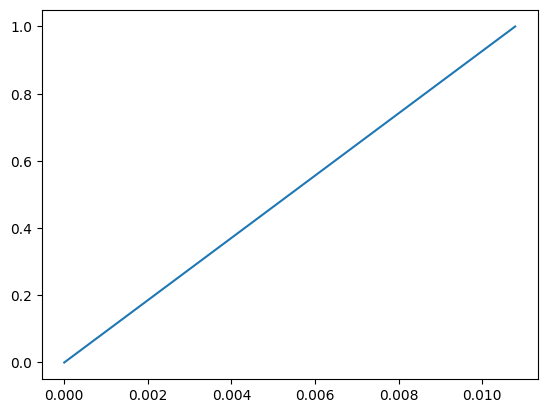

In [91]:
thresh = 0.1
pr_list = []
rec_list = []

#print(y_pred)


for i in range(0,10):
    thresh = 0.1*i
    y_pred_for_it = y_pred.copy()
    y_pred_for_it [y_pred > thresh] = 1
    y_pred_for_it [y_pred <= thresh] = 0
    #print(y_pred_for_it)
    cm = confusion_matrix(y_test, y_pred_for_it)
    """plot_confusion_matrix(cm, ['0', '1'], )"""
    pr, tpr, fpr = show_data(cm)
    print(thresh)
    pr_list.append(pr)
    rec_list.append(tpr)
plt.plot(pr_list,rec_list)
plt.show()




In [92]:
print(y_pred)
print(y_test)

[0.00400395 0.00174452 0.00189137 0.00397563 0.00545535 0.00262091
 0.00214545 0.00190344 0.00153785 0.00468749 0.00765111 0.00232423
 0.00174452 0.00326203 0.00727377 0.00262091 0.00189137 0.00214545
 0.00481118 0.00153785 0.00868794 0.00174452 0.00153785 0.00214545
 0.00153785 0.00153785 0.00237223 0.00314834 0.00153785 0.00237223
 0.00214545 0.00230949 0.00707305 0.00190344 0.00607274 0.00153785
 0.00153785 0.00237223 0.00285801 0.00314834 0.0019155  0.00703192
 0.00214545 0.00214545 0.00153785 0.00153785 0.00232423 0.00153785
 0.00257874 0.00217282 0.00190344 0.00257874 0.0019155  0.00153785
 0.00153785 0.00233895 0.00387259 0.00670338 0.00237067 0.00189137
 0.00265511 0.00153785 0.00262091 0.00174452 0.00355871 0.00289445
 0.00189137 0.00449335 0.00595928 0.00257874 0.00355871 0.00257874
 0.00189137 0.00235564 0.00257874 0.0019155  0.00153785 0.00230949
 0.00429138 0.00468749 0.00261959 0.01456706 0.00153785 0.00189137
 0.00153785 0.04051037 0.00153785 0.00153785 0.00214545 0.0035

In [93]:
y_res = y_pred*y_test
for item in y_res:
    if (item>0):
        print(item)

0.04051037132740021
0.04051037132740021
0.04051037132740021


In [94]:
print(pr_list)
print(rec_list)

[0.01079136690647482, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


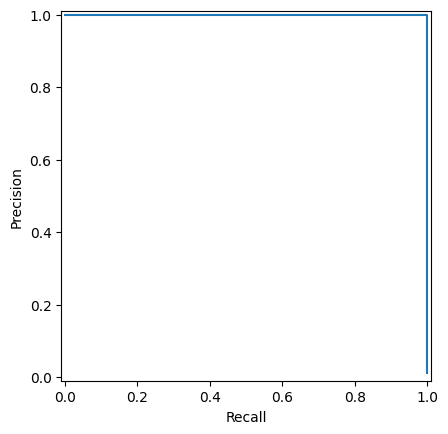

In [95]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, thresholds  = precision_recall_curve(y_test, y_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [96]:
print(thresholds)

[0.00153785 0.00174452 0.00187797 0.00189137 0.00190344 0.0019155
 0.00194277 0.00213025 0.00214545 0.00217282 0.00220374 0.00230949
 0.00231065 0.00232423 0.00233895 0.00234082 0.00235564 0.00237067
 0.00237223 0.00257874 0.00261959 0.00262091 0.00263631 0.00265511
 0.00267192 0.00269073 0.00274447 0.00284132 0.00285801 0.0028761
 0.00289445 0.00291509 0.002917   0.00294975 0.00297525 0.00314834
 0.00317079 0.0032226  0.00326203 0.00326367 0.00328283 0.0033084
 0.00349083 0.00355871 0.00360928 0.00365526 0.00387065 0.00387259
 0.00394787 0.00397563 0.00400395 0.00403587 0.00404054 0.00425449
 0.00429138 0.00434601 0.00449335 0.00468749 0.00481118 0.0048491
 0.00488681 0.00533844 0.00534162 0.00545159 0.00545535 0.0057202
 0.00576088 0.00580893 0.00595928 0.00607274 0.0066561  0.00670338
 0.00702841 0.00703192 0.00707305 0.00721342 0.00727377 0.0073619
 0.00765111 0.00868794 0.00897851 0.00910366 0.01266259 0.01456706
 0.01786218 0.04051037]


In [97]:

print(sorted(prec))

[0.01079136690647482, 0.012875536480686695, 0.013888888888888888, 0.014084507042253521, 0.015228426395939087, 0.015544041450777202, 0.016129032258064516, 0.016304347826086956, 0.016574585635359115, 0.01775147928994083, 0.017857142857142856, 0.01818181818181818, 0.019230769230769232, 0.019736842105263157, 0.02054794520547945, 0.02127659574468085, 0.02158273381294964, 0.021897810218978103, 0.022222222222222223, 0.022900763358778626, 0.024793388429752067, 0.02608695652173913, 0.026785714285714284, 0.02702702702702703, 0.02727272727272727, 0.027522935779816515, 0.02830188679245283, 0.028846153846153848, 0.02912621359223301, 0.030612244897959183, 0.031914893617021274, 0.033707865168539325, 0.03409090909090909, 0.034482758620689655, 0.03488372093023256, 0.03529411764705882, 0.037037037037037035, 0.038461538461538464, 0.03896103896103896, 0.039473684210526314, 0.04, 0.04054054054054054, 0.0410958904109589, 0.04225352112676056, 0.046153846153846156, 0.046875, 0.047619047619047616, 0.0491803278

In [98]:
print(recall)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
